In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## ABC-анализ

Основные цели ABC-анализа:

*   Оптимизация ассортимента – выявление наиболее и наименее значимых товаров.
*   Эффективное управление запасами – контроль закупок и складских остатков.

*   Распределение ресурсов – фокусировка на ключевых клиентах или поставщиках.

*   Повышение прибыльности – концентрация на товарах/услугах, приносящих основной доход.

<br>

По принципу Парето 20% товаров дают 80% прибыли. ABC-анализ находит эти прибыльные 20%, разделив ассортимент на три группы:

* **A — лидеры**: 20% товаров, которые приносят 80% прибыли;
* **B — середнячки**: 30%, которые приносят 15% прибыли;
* **C — аутсайдеры**: оставшиеся 50%, которые составляют 5% прибыли.

### Загрузка данных

Этот набор данных представляет собой синтетические данные о продажах, созданные только для практических целей. Он не является данными в реальном времени и не основан на реальных бизнес-операциях. Набор данных содержит информацию, которая имитирует транзакции продаж по разным продуктам

In [3]:
# считываем данные
data = pd.read_csv('sales_data.csv', sep =',')
data.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


Данные позволяют провести многомерный анализ по выручке, прибыли и количеству проданного товара. Для подсчета прибыли добавим столбец с разницей себестоимости товара и розничной цены.

In [4]:
data['Profit'] = data['Unit_Price'] - data['Unit_Cost'] #прибыль с еденицы товара
data

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Profit
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,114.47
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,393.05
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David,109.84
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob,137.72
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,55.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1010,2023-04-15,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,North-Charlie,499.12
996,1067,2023-09-07,Bob,North,4716.36,37,Clothing,1754.32,1856.40,New,0.21,Bank Transfer,Retail,North-Bob,102.08
997,1018,2023-04-27,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,South-David,82.55
998,1100,2023-12-20,David,West,1629.47,39,Electronics,3685.03,3743.39,New,0.01,Bank Transfer,Online,West-David,58.36


### Составление ABC групп по выручке

In [5]:

sales_amount_df = data.groupby('Product_ID', as_index=False)['Sales_Amount'].sum().sort_values('Sales_Amount', ascending=False)
sales_amount_df['percentage'] = sales_amount_df['Sales_Amount'] / sum(sales_amount_df['Sales_Amount'])
sales_amount_df['cumsum'] = sales_amount_df.percentage.cumsum()
sales_amount_df.head()

,Product_ID,Sales_Amount,percentage,cumsum
98,1099,101773.87,0.020277,0.020277
91,1092,90615.62,0.018054,0.038330
32,1033,89130.41,0.017758,0.056088
89,1090,88043.25,0.017541,0.073629
85,1086,82269.71,0.016391,0.090020


In [6]:
#Теперь присвоим категории в соответсвии в приинципом Парето
def categorize(row):
    if row <= 0.8:
        return 'A'
    elif row <= 0.95:
        return 'B'
    else:
        return 'C'

sales_amount_df['sales_group'] =sales_amount_df['cumsum'].apply(categorize)
sales_amount_df.head()

,Product_ID,Sales_Amount,percentage,cumsum,sales_group
98,1099,101773.87,0.020277,0.020277,A
91,1092,90615.62,0.018054,0.038330,A
32,1033,89130.41,0.017758,0.056088,A
89,1090,88043.25,0.017541,0.073629,A
85,1086,82269.71,0.016391,0.090020,A


### Составление ABC групп по прибыли

In [7]:
profit_df = data.groupby('Product_ID', as_index = False).Profit.sum().sort_values('Profit', ascending=False)
profit_df['percentage'] = profit_df['Profit'] / sum(profit_df['Profit'])
profit_df['cumsum'] = profit_df.percentage.cumsum()
profit_df['profit_group'] = profit_df['cumsum'].apply(categorize)

In [8]:
profit_df.head()

,Product_ID,Profit,percentage,cumsum,profit_group
91,1092,5779.96,0.022833,0.022833,A
89,1090,5693.19,0.022491,0.045324,A
0,1001,4780.26,0.018884,0.064208,A
62,1063,4372.75,0.017274,0.081483,A
85,1086,4367.90,0.017255,0.098738,A


### Составление ABC групп по количеству продаж

In [10]:
quantity_df = data.groupby('Product_ID', as_index = False).Quantity_Sold.sum().sort_values('Quantity_Sold', ascending=False)
quantity_df['percentage'] = quantity_df['Quantity_Sold'] / sum(quantity_df['Quantity_Sold'])
quantity_df['cumsum'] = quantity_df.percentage.cumsum()
quantity_df['quantity_group'] = quantity_df['cumsum'].apply(categorize)

In [11]:
quantity_df.head()

,Product_ID,Quantity_Sold,percentage,cumsum,quantity_group
89,1090,590,0.023270,0.023270,A
91,1092,548,0.021613,0.044883,A
61,1062,506,0.019957,0.064839,A
98,1099,502,0.019799,0.084638,A
57,1058,452,0.017827,0.102465,A


### Объединение групп в многомерный ABC

In [18]:
abc_df = pd.merge(sales_amount_df, profit_df, on ='Product_ID')
abc_df = pd.merge(abc_df, quantity_df, on ='Product_ID')
abc_df = abc_df[['Product_ID','sales_group','profit_group','quantity_group']]
abc_df['abc_groups'] = abc_df.sales_group + abc_df.profit_group + abc_df.quantity_group
abc_df


,Product_ID,sales_group,profit_group,quantity_group,abc_groups
0,1099,A,A,A,AAA
1,1092,A,A,A,AAA
2,1033,A,A,A,AAA
3,1090,A,A,A,AAA
4,1086,A,A,A,AAA
...,...,...,...,...,...
95,1011,C,C,C,CCC
96,1079,C,C,B,CCB
97,1041,C,C,C,CCC
98,1031,C,C,C,CCC


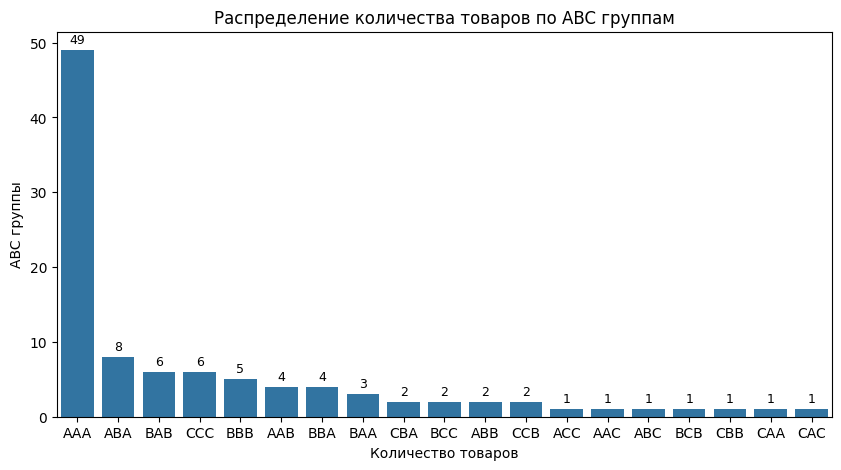

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=abc_df.abc_groups,order=abc_df.abc_groups.value_counts().index, gap = 0.2, width = 1, ax = ax)
plt.title('Распределение количества товаров по ABC группам')
plt.xlabel('Количество товаров')
plt.ylabel('ABC группы')

# Добавление подписей
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # x-позиция (центр столбца)
        height + 0.5,                       # y-позиция (чуть выше вершины)
        f'{int(height)}',                    # текст (значение высоты)
        ha='center',                         # горизонтальное выравнивание
        va='bottom',                         # вертикальное выравнивание
        fontsize=9
    )

### Выводы


*   Группа AAA



 Наиболее ценные позиции. Требуют особого внимания в плане наличия на складе, мониторинга цен и качества обслуживания. Подход: максимальное внимание, контроль и развитие.

* Группа ABA

**Показатели**: отличное число продаж и маржинальность, однако выручка немного отстаёт

**Рекомендации**:  Возможен пересмотр цен или себестоимости для увеличения прибыли. Продажи идут хорошо — важны для оборота.

* Группа BAB

**Показатели**: отличная выручка, однако отстает число продаж и прибыль.

**Рекомендации**: Перспективные товары. Имеет смысл поддерживать, может быть выгодно продвигать

* Группа CCC

**Показатели**: мало продаются, имеют низкую выручку и прибыль

**Рекомендации**:  Кандидаты на списание, распродажу или замену. Нужно рассмотреть целесообразность хранения.

* Группа BBB

**Показатели**: средние показатели по всем параметрам (кол-во продаж, выручка, прибыль)

**Рекомендации**: Могут быть «резервными» товарами. Требуют оценки перспективности.

- переставить товар на более видное место, либо использовать кросс-продажи (предложение клиенту дополнительных товаров, которые логически дополняют его покупку) для увеличения продаж
- оптимизировать издержки (найти нового поставщика, либо договориться с текущим) для понижения себестоимости
- привить любовь к нишевым товарам, возможно покупатели не знакомы с некоторыми брендами, сделать упор на их рекламу

* Группы AAB и ABB

**Показатели**: отличная продаваемость при средней маржинальности.

**Рекомендации**: нужно найти более выгодную цену поставки чтобы стать AAA, либо немного подтянуть цену, если товар имеет стабильно высокий спрос.

* Группы BBA и BAA

**Показатели**: отличная маржинальность, однако можно улучшить продаваемость товара

**Рекомендации**: увеличить число продаж с помощью маркетинговых активностей, например 2+1, либо скидка при покупке от определенного количества товара.

* Группа BCC

**Показатели**: средние продажи, но плохая выручка и маржинальность

**Рекомендации**: в данной категории не получится поднять маржинальность за счет скидок на товар, так как могут упасть продажи, опять же стоит пересмотреть себестоимость

* Группа CBA

**Показатели**: отличная маржинальность при малом числе продаж

**Рекомендации**: возможно это нишевые товары, для которых особо поднять продажи не получится, но они все равно генерируют прибыль за счет своей высокой маржинальности, можно попробовать увеличить узнаваемость данных товаров среди большего числа покупателей - временно сделать скидку, тогда возможно товар найдет новых фанатов.

* Группа CCB

**Показатели**: плохая продаваемость и выручка, средний показатель маржинальности

**Рекомендации**: есть потенциал за счет показателя маржинальности, если вырастить количество продаж без потери в прибыли, то поднимется и выручка.

* Остальные группы (например, ABC, AAC, BCB, CBB, CAA, ACC, CAC по 1 товару)

**Показатели**: каждая из этих групп имеет свою комбинацию показателей, где один или несколько аспектов требуют улучшения.

**Рекомендации**: одноразовые продукты требуют индивидуального анализа, так как небольшой объём может указывать как на нишевый характер, так и на экспериментальную категорию.